<a href="https://colab.research.google.com/github/pedro-hernandez-esquivias/Programacion/blob/main/Unidad_3_Ejemplo_Particular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación particular del clasificador kNN (k-Nearest Neighbors)

## Ejemplo con caso particular

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

## Generación de datos

In [2]:
X, y = make_moons(50, noise=0.1)

## Creación y Entrenamiento del modelo kNN

In [3]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

KNeighborsClassifier()

## Evaluación del modelo

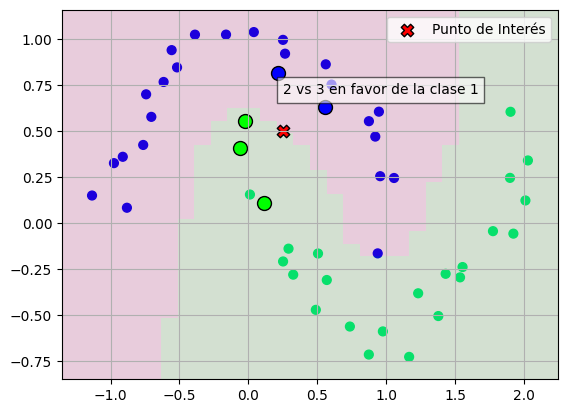

In [4]:
# Establece el mapa de colores
cmap = plt.cm.bwr

# Establece el mapa de colores que usaremos para representar las dos clases.
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter')

# Crea una cuadrícula de valores para evaluar el modelo
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Predice las clases para cada punto en la cuadrícula
Z_pred = clf.predict(xy)
Z_pred = Z_pred.reshape(XX.shape)

# Representación de las áreas de decisión
cmap_area = plt.cm.PiYG
plt.pcolormesh(XX, YY, Z_pred, cmap=cmap_area, alpha=0.2)

# Supongamos que queremos visualizar los vecinos más cercanos para un punto específico
sample_point = np.array([[0.25, 0.5]])

# Usamos el método kneighbors para obtener los índices de los vecinos más cercanos
distances, indices = clf.kneighbors(sample_point)

# Extraemos las coordenadas y clases de los vecinos más cercanos
neighbors = X[indices]
neighbor_classes = y[indices]

# Dibuja los vecinos más cercanos, coloreando según su clase
for i, (x, y) in enumerate(neighbors[0]):
    color = 'blue' if neighbor_classes[0][i] == 0 else 'lime'
    plt.scatter(x, y, color=color, edgecolors='black', s=100)

# Dibuja el punto específico para el cual queremos ver los vecinos
plt.scatter(sample_point[:, 0], sample_point[:, 1], color='red', edgecolors='black', s=80, marker='X', label='Punto de Interés')

# Calcula cuántos vecinos de cada clase están alrededor
votes_class_blue = sum(neighbor_classes[0] == 0)
votes_class_green = sum(neighbor_classes[0] == 1)

# Muestra un contador de votos cerca del punto de interés
text = f"{votes_class_blue} vs {votes_class_green} en favor de la clase {clf.predict(sample_point)[0]}"
plt.text(sample_point[0, 0], sample_point[0, 1] + 0.2, text, bbox=dict(facecolor='white', alpha=0.6))

plt.grid()
plt.legend()  # Para mostrar la leyenda
plt.show()

## Experimentación con Diferentes valores de 'k'

Observamos cómo puede variar la clasificación de sample_point en función del 'k' observable.

En primer lugar, se quiere comprobar la precisón a medida que se va aumentando el número de 'k'.

In [5]:
# Valores de K a probar
k_values = range(1, 20)
accuracy_scores = []

# Bucle para probar cada valor de K
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    accuracy = np.mean(y_pred == y)
    accuracy_scores.append(accuracy)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Precisión del Modelo kNN en función de K')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.show()

TypeError: ignored

En segundo lugar, comprobamos si varia o no la clasificación de sample_point a medida que vamos aumentando el valor de k.

In [43]:
# Valores de K a probar
k_values = range(1, 20)

# Bucle para probar cada valor de K
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    predicted_class = clf.predict(sample_point)[0]
    print(f'Con K={k}, el punto de muestra se clasifica como clase {predicted_class}')

TypeError: ignored

In [44]:
# Métricas de distancia a probar
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Bucle para probar cada métrica de distancia
for metric in distance_metrics:
    clf = KNeighborsClassifier(n_neighbors=5, metric=metric)
    clf.fit(X, y)
    predicted_class = clf.predict(sample_point)[0]
    print(f'Usando la métrica {metric}, el punto de muestra se clasifica como clase {predicted_class}')

TypeError: ignored